# Раздел 2: Аналитическое приближение функций

## Лабораторная работа № 2: Интерполяция, сплайны (Задание 11)
 
Выполнил студнет 854 группы ФЭФМ
  
_Артемий Атепалихин_

## Теория

#### Обобщенный интерполяционный многочлен:
$$\Phi_N(x_k) = \sum_{n=0}^N a_n \varphi_n(x_k) = f_k, \;\; k =0...N$$
#### Алгебраическая интерполяционная система:
$$\left \{ 1, x, x^2, ..., x^N, ... \right \}$$



#### Алгебраический интерполяционный многочлен в форме Ньютона:
$$P_N(x) = \sum_{n=0}^N b_n \prod_{i=0}^{n-1} (x-x_i) = b_0 + b_1(x-x_0)+...b_N(x-x_0)...(x-x_{N-1}),$$
где коэффициенты $b_n$ (разделенные разности n-порядка) находятся по ф-ле:
$$b_n = \frac{f(x_1, x_2,..., x_n) - f(x_1, x_2,..., x_{n-1})}{x_n - x_0} = f(x_0, x_1,..., x_n)$$

$$b_i = \frac{f_i - \left ( \sum\limits_{j=0}^{i-1} b_j \prod\limits_{k=0}^{j-1} (x_i - x_k) \right )}{\prod\limits_{j=0}^{i-1}(x_i - x_j)}$$



#### Алгебраический интерпляционный многочлен в форме Лагранжа:
$$P_N(x) = \sum_{n=0}^N f_n \prod_{i = 0}^N \frac{(x - x_i)}{(x_n - x_i)}$$

#### Определение:
Кусочно-многочленный интерполянт, обладающий не только свойством непрерывности, но и гладкости заданного порядка называется **_сплайном_**

## 1 Добавим нужные библиотеки, введем начальные данные

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import itertools

In [2]:
x = np.array([0.17453, 0.5236, 0.87267, 1.22173, 1.5708, 1.91986, 2.26893])
y = np.array([0.00162, 0.00252, 0.00498, 0.0129, 0.03964, 0.1207, 0.34097])

## 2 Расчитаем коэффициенты $b_i$ для полнима Ньютона

Коэффициенты $b_i$ удобнее расчитывать по алгоритму с семинара, когда записывали табличку

In [3]:
b = []
delta = y
dif = 1
while 1:
    b.append(delta[0])

    size = len(delta)
    if(size == 1):
        break;

    delta = [(delta[i+1]-delta[i])/(x[i+dif]-x[i]) for i in range(size-1)]
    dif += 1
for k in range(len(x)):
    print('b_{} = {:.6e}'.format(k, b[k]))

b_0 = 1.620000e-03
b_1 = 2.578279e-03
b_2 = 6.401320e-03
b_3 = 1.528319e-02
b_4 = 2.654673e-02
b_5 = 2.039566e-02
b_6 = 1.117457e-02


## 3 Приведем к алгебраическому виду

In [4]:
N = len(b)
def mul_tp(tpl):
    result = 1
    for i in range(len(tpl)):
        result *= - tpl[i]

    return result
coef = [b[N-1-i]+sum(b[N-1-j] * sum(mul_tp(el) for el in 
                                    itertools.combinations(x[:N-1-j], i-j))  
                     for j in range(i)) for i in range(N)]

for k in range(len(x)):
    print('a_{} = {:.6e}'.format(k, coef[k]))

a_0 = 1.117457e-02
a_1 = -4.981626e-02
a_2 = 1.094543e-01
a_3 = -1.227016e-01
a_4 = 7.479615e-02
a_5 = -1.939146e-02
a_6 = 3.284560e-03


### Построим полученый полином

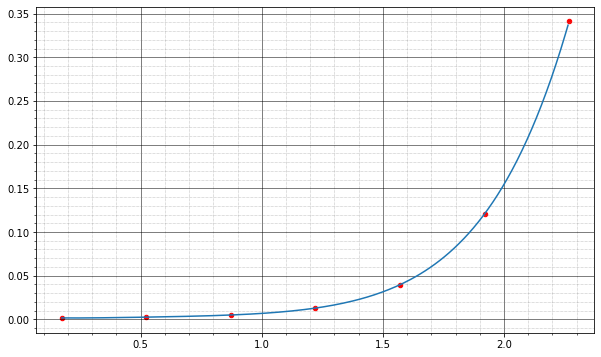

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
x_pl = np.arange(x[0], x[-1], 0.01)
ax.plot(x_pl, np.polyval(coef, x_pl))
ax.scatter(x, y, color = 'red', s = 20)

ax.grid(which='major',color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

# plt.xlim (0.75, 2.75)
# plt.ylim (-0.5, 4.5)
plt.savefig('plot.png', dpi=400, quality=100)
plt.show()

## 4 Рассчитаем коэффициенты для сплайнов

In [7]:
spl_coef = {}

der = np.polyder(coef)

for i in range(x.size-1):

    p_i = np.polyval(der, x[i])
    p_i1 = np.polyval(der, x[i+1])

    spl_coef[i] = []
    spl_coef[i].append(
    (p_i1*(x[i+1]-x[i]) - 2*(y[i+1]-y[i])+p_i*(x[i+1]-x[i]))/
    ( (x[i+1]-x[i])**3 )
    )
    spl_coef[i].append(
    (-p_i1*(x[i+1]-x[i])*(x[i+1]+2*x[i]) + 3 *
     (y[i+1]-y[i])*(x[i+1]+x[i]) - p_i*(x[i+1]-x[i])*(x[i]+2*x[i+1]))/
    ( (x[i+1]-x[i])**3 )
    )
    spl_coef[i].append(
    (p_i1*x[i]*(2*x[i+1]+x[i])*(x[i+1]-x[i]) - 6 * 
     (y[i+1] - y[i])*x[i]*x[i+1] + p_i*x[i+1]*(x[i+1]+2*x[i])*(x[i+1]-x[i]))/
    ( (x[i+1]-x[i])**3 )   
    )
    spl_coef[i].append(
    (-p_i1*(x[i]**2)*x[i+1]*(x[i+1]-x[i])+y[i+1]*(x[i]**2)*(3*x[i+1] - x[i]) 
     + y[i] * (x[i+1]**2) * (x[i+1] - 3*x[i]) - p_i*x[i]*(x[i+1]**2)*(x[i+1]-x[i])  )/
    ( (x[i+1]-x[i])**3 )
    )
    
for key in spl_coef.keys():
    output = '{})'.format(key+1)

    for i in range(len(spl_coef[key])):
        output += ' a{} = '.format(i) + '{:.6E}'.format(spl_coef[key][i])

    print(output)    

1) a0 = -2.267777E-02 a1 = 3.401869E-02 a2 = -1.219075E-02 a3 = 2.831980E-03
2) a0 = 1.601649E-02 a1 = -2.425951E-02 a2 = 1.701327E-02 a3 = -2.036380E-03
3) a0 = 4.737921E-02 a1 = -1.078463E-01 a2 = 9.124759E-02 a3 = -2.400582E-02
4) a0 = 1.284451E-01 a1 = -4.104294E-01 a2 = 4.675945E-01 a3 = -1.799877E-01
5) a0 = 3.162473E-01 a1 = -1.304870E+00 a2 = 1.887412E+00 a3 = -9.311698E-01
6) a0 = 6.678202E-01 a1 = -3.343208E+00 a2 = 5.826512E+00 a3 = -3.468505E+00


### Для проверки значений интерполяции сплайном  в разных точках

In [191]:
np.polyval(spl_coef[0], 0.25)

91.703125